$$
\mathbf{A}\mathbf{v_i} = \mathbf{v_i} \lambda_i
$$

$$
\mathbf{A} = \left(\begin{matrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
\end{matrix}\right)
$$

$$
\mathbf{v_i} = \left(\begin{matrix}
    v_{1i} \\
    v_{2i}
\end{matrix}\right)
$$

$$
\mathbf{V} = \left(\begin{matrix}
\mathbf{v_1}, \mathbf{v_2}
\end{matrix}\right)
$$

$$
\mathbf{\Sigma} = \left(\begin{matrix}
    \lambda_1 & 0 \\
    0 & \lambda_2
\end{matrix}\right)
$$

$$
\mathbf{A} \mathbf{V} = \mathbf{V} \mathbf{\Sigma}
$$

$$
\left(\begin{matrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
\end{matrix}\right)
\left(\begin{matrix}
    v_{11} & v_{12} \\
    v_{21} & v_{22} \\
\end{matrix}\right)
=
\left(\begin{matrix}
    v_{11} & v_{12} \\
    v_{21} & v_{22} \\
\end{matrix}\right)
\left(\begin{matrix}
    \lambda_1 & 0\\
    0 & \lambda_2
\end{matrix}\right)
$$

$$
\left(\begin{matrix}
    a_{11}v_{11} + a_{12}v_{21} & a_{11}v_{12} + a_{12}v_{22}\\
    a_{21}v_{11} + a_{22}v_{21} & a_{21}v_{12} + a_{22}v_{22}\\
\end{matrix}\right)
=
\left(\begin{matrix}
    v_{11}\lambda_1 & v_{12}\lambda_2 \\
    v_{21}\lambda_1 & v_{22}\lambda_2
\end{matrix}\right)
$$

- Diagonalizacion de matrices:

$$
\mathbf{A}\mathbf{V} = \mathbf{V}\mathbf{\Sigma}\\
\mathbf{A} = \mathbf{V}\mathbf{\Sigma}\mathbf{V}^{-1}\\
\mathbf{A} = \mathbf{V}\mathbf{U}
$$

## Latent Semantic Analysis (LSA) // Latent Semantic Indexing (LSI)

- $\mathbf{X} \in \mathbb{R} ^ {N \times m}$: matriz de embeddings a nivel documento.
- $\mathbf{H} \in \mathbb{R} ^ {N \times L}$: matriz documento-topico.
- $\mathbf{U} \in \mathbb{R} ^ {L \times m}$: matriz topico-termino.
- $N$: numero de documentos.
- $m$: tamano del embedding.
- $L$: numero de topicos.

$$
\mathbf{X} = \mathbf{H}\mathbf{U}
$$

In [1]:
%%shell
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [146]:
import re
import json
import nltk
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from abc import ABC, abstractmethod
from unidecode import unidecode
from numpy.typing import ArrayLike
from typing import List, Protocol, Type
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from dataclasses import dataclass
from wordcloud import WordCloud

plt.style.use("ggplot")
tqdm.pandas()
nltk_pkgs = ["stopwords", "punkt"]
for pkg in nltk_pkgs:
    nltk.download(pkg)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%%shell
cp '/content/drive/MyDrive/archive.zip' .
unzip archive.zip

Archive:  archive.zip
  inflating: News_Category_Dataset_v3.json  


In [4]:
with open("News_Category_Dataset_v3.json", "r") as f:
    lines = f.read().split("\n")
    valid_data = []
    for line in lines:
        try:
            valid_data.append(json.loads(line))
        except:
            print("Invalid json")
    df = pd.DataFrame(valid_data).filter(["short_description", "category"])

Invalid json


In [5]:
df

,short_description,category
0,Health experts said it is too early to predict...,U.S. NEWS
1,He was subdued by passengers and crew when he ...,U.S. NEWS
2,"""Until you have a dog you don't understand wha...",COMEDY
3,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS
...,...,...
209522,Verizon Wireless and AT&T are already promotin...,TECH
209523,"Afterward, Azarenka, more effusive with the pr...",SPORTS
209524,"Leading up to Super Bowl XLVI, the most talked...",SPORTS
209525,CORRECTION: An earlier version of this story i...,SPORTS


In [7]:
counts = df.category.value_counts()
most_freq_cats = counts.index[:6].to_list()
most_freq_cats

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'TRAVEL',
 'STYLE & BEAUTY',
 'PARENTING']

In [8]:
filtered_df = df.query("category in @most_freq_cats")
filtered_df.shape

(99414, 2)

In [10]:
df_sample = (
    filtered_df
    .groupby("category")
    .sample(8000, replace=False)
)

In [11]:
df_sample

,short_description,category
71059,As if you didn't know already ...,ENTERTAINMENT
53656,"""The words that he’s been using really are an ...",ENTERTAINMENT
9646,It's all in the details.,ENTERTAINMENT
78018,LOL.,ENTERTAINMENT
101682,A fairytale ending can certainly happen for an...,ENTERTAINMENT
...,...,...
186395,Dieters beware: A new report has found that do...,WELLNESS
169047,"This is an interview with Traci Lundstrom, who...",WELLNESS
170907,We must embrace the fact that true beauty does...,WELLNESS
138741,And state lawmakers don't just regulate safety...,WELLNESS


In [14]:
%%writefile main.pyx

Writing main.py


In [15]:
%%writefile main.pyi
def print_smt(x: str) -> None:
    ...

Writing main.pyi


- pyright
- mypy

In [23]:
class Model(Protocol):
    @abstractmethod
    def fit(self, X: ArrayLike, y: ArrayLike) -> "Model":
        ...

    def predict(self, X: ArrayLike) -> ArrayLike:
        ...

In [24]:
def operate_model(model: Model) -> str:
    return f"hello {model}"

In [26]:
model = LinearRegression()

In [ ]:
operate_model(model)

In [27]:
type(model)

sklearn.linear_model._base.LinearRegression

In [62]:
# class WordRange:
#     minval: int
#     maxval: int
#     def __init__(self, minval: int, maxval: int):
#         self.minval = minval
#         self.maxval = maxval
#
#     def __repr__(self) -> str:
#         return f"WordRange(minval = {self.minval}, maxval={self.maxval})"
# wr = WordRange(minval=2, maxval=3)
# print(wr.minval)
# print(wr)

@dataclass
class WordRange:
    minval: int
    maxval: int

@dataclass
class Config:
    lang: str
    sw: List[str]
    word_range: WordRange

class Step(ABC):
    def __init__(self, cfg: Config):
        self.cfg = cfg

    @abstractmethod
    def forward(self, text: str) -> str:
        ...

class NormStep(Step):
    def forward(self, text: str) -> str:
        return unidecode(text)

class LowerStep(Step):
    def forward(self, text: str) -> str:
        return text.lower()

class TokenStep(Step):
    def forward(self, text: str) -> str:
        tokens = word_tokenize(text, language=self.cfg.lang)
        return " ".join(tokens)

class StopWordStep(Step):
    def forward(self, text: str) -> str:
        tokens = text.split(" ")
        filtered_tokens = filter(
            lambda token: token not in self.cfg.sw,
            tokens
        )
        return " ".join(filtered_tokens)

class WordLenStep(Step):
    def forward(self, text: str) -> str:
        tokens = text.split(" ")
        filtered_tokens = filter(
            lambda token: (
                len(token) >= self.cfg.word_range.minval and
                len(token) <= self.cfg.word_range.maxval
            ),
            tokens
        )
        return " ".join(filtered_tokens)

class RegexStep(Step):
    pats: List[re.Pattern] = [
        re.compile(r"[^a-z ]"),
        re.compile(r" +"),
    ]
    def forward(self, text: str) -> str:
        for pat in self.pats:
            text = re.sub(pat, " ", text)
        return text

class StripStep(Step):
    def forward(self, text: str) -> str:
        return text.strip()

class Preprocessor:
    def __init__(self, steps: List[Type[Step]], cfg: Config):
        self.steps = steps
        self.cfg = cfg

    def preprocess(self, text: str) -> str:
        for step in self.steps:
            text = step(self.cfg).forward(text)
        return text

In [63]:
cfg = Config(
    lang="english",
    sw=stopwords.words("english"),
    word_range=WordRange(minval=3, maxval=10)
)

In [100]:
preprocessor = Preprocessor(
    steps=[
        NormStep,
        LowerStep,
        TokenStep,
        RegexStep,
        StopWordStep,
        WordLenStep,
        StripStep
        ],
    cfg=cfg
)

In [101]:
preprocessor.preprocess(df_sample.short_description.iloc[0])

'know already'

In [102]:
df_sample

,short_description,category
71059,As if you didn't know already ...,ENTERTAINMENT
53656,"""The words that he’s been using really are an ...",ENTERTAINMENT
9646,It's all in the details.,ENTERTAINMENT
78018,LOL.,ENTERTAINMENT
101682,A fairytale ending can certainly happen for an...,ENTERTAINMENT
...,...,...
186395,Dieters beware: A new report has found that do...,WELLNESS
169047,"This is an interview with Traci Lundstrom, who...",WELLNESS
170907,We must embrace the fact that true beauty does...,WELLNESS
138741,And state lawmakers don't just regulate safety...,WELLNESS


In [103]:
df_preprocess = (
    df_sample
    .assign(
        prep_text=df_sample.short_description.progress_apply(
            preprocessor.preprocess
            )
        )
)

100%|██████████| 48000/48000 [00:18<00:00, 2657.69it/s]


In [104]:
df_preprocess

,short_description,category,prep_text
71059,As if you didn't know already ...,ENTERTAINMENT,know already
53656,"""The words that he’s been using really are an ...",ENTERTAINMENT,words using really attack entire democratic pr...
9646,It's all in the details.,ENTERTAINMENT,details
78018,LOL.,ENTERTAINMENT,lol
101682,A fairytale ending can certainly happen for an...,ENTERTAINMENT,fairytale ending certainly happen artist music...
...,...,...,...
186395,Dieters beware: A new report has found that do...,WELLNESS,dieters beware new report found dozens dietary...
169047,"This is an interview with Traci Lundstrom, who...",WELLNESS,interview traci lundstrom began learning yoga ...
170907,We must embrace the fact that true beauty does...,WELLNESS,must embrace fact true beauty must transcend d...
138741,And state lawmakers don't just regulate safety...,WELLNESS,state lawmakers regulate safety upstate new yo...


In [105]:
vect = TfidfVectorizer(min_df=10).fit(df_preprocess.prep_text)

In [106]:
tfidf = vect.transform(df_preprocess.prep_text)

In [107]:
tfidf

<48000x7134 sparse matrix of type '<class 'numpy.float64'>'
	with 471488 stored elements in Compressed Sparse Row format>

In [108]:
pipe = Pipeline([
    ("vect", TfidfVectorizer(min_df=10)),
    ("fact", TruncatedSVD(n_components=10))
])

In [109]:
pipe.fit(df_preprocess.prep_text)

Pipeline(steps=[('vect', TfidfVectorizer(min_df=10)),
                ('fact', TruncatedSVD(n_components=10))])

In [110]:
doctop_matrix = pipe.transform(df_preprocess.prep_text)

In [111]:
doctop_matrix.shape

(48000, 10)

In [112]:
topterm_matrix = pipe.named_steps["fact"].components_

In [113]:
topterm_matrix.shape

(10, 7134)

In [114]:
vocab = pipe.named_steps["vect"].get_feature_names_out()

In [115]:
vocab[:10]

array(['aaron', 'abandon', 'abandoned', 'abbey', 'abc', 'abilities',
       'ability', 'able', 'aboard', 'abortion'], dtype=object)

## Topico - Termino

In [116]:
topterm_matrix = pipe.named_steps["fact"].components_
vocab = pipe.named_steps["vect"].get_feature_names_out()

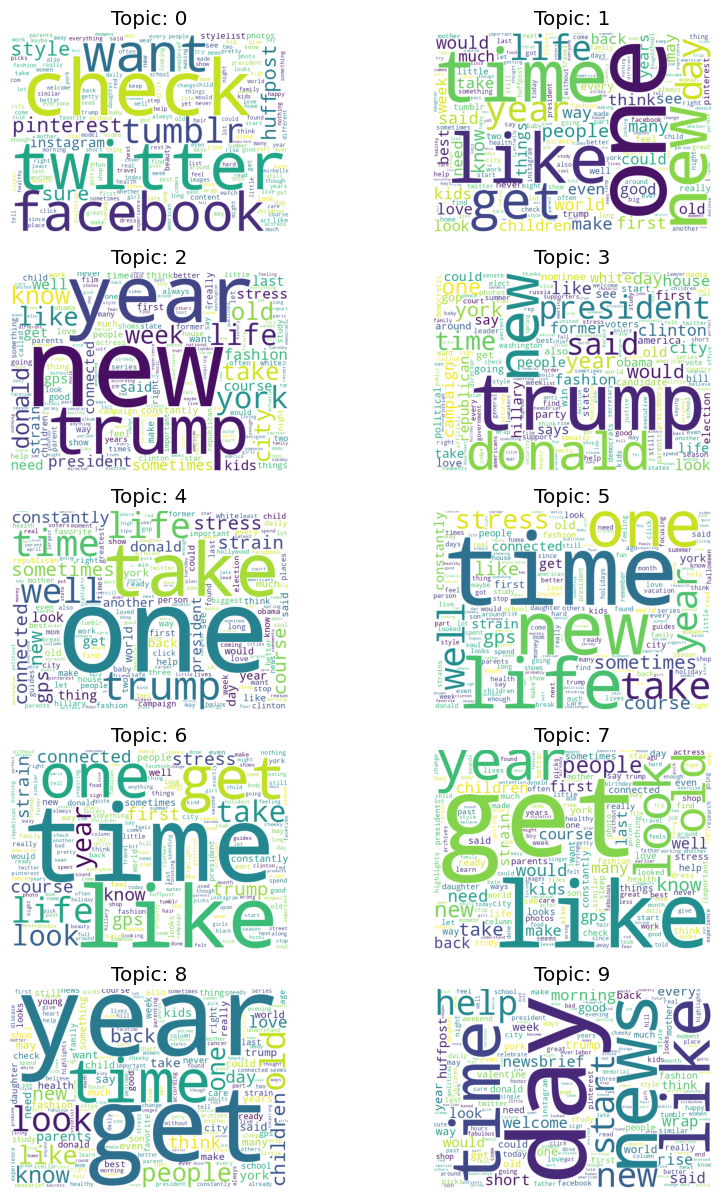

In [119]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for topic in range(topterm_matrix.shape[0]):
    ax = axes[topic // 2, topic % 2]
    word_importances = np.abs(topterm_matrix[topic])
    dict_importances = dict(zip(vocab, word_importances))
    wc = (
        WordCloud(background_color="white", height=500, width=700)
        .generate_from_frequencies(dict_importances)
    )
    ax.imshow(wc)
    ax.axis("off")
    ax.set(title=f"Topic: {topic}")

In [131]:
df_sample.query("category == 'PARENTING'")

,short_description,category
208013,"February is American Heart Month, which is a r...",PARENTING
202831,"A week before Henry's quick delivery, Katherin...",PARENTING
142926,"Back when our children were infants, a local m...",PARENTING
170608,Preschool must all too often be purchased for ...,PARENTING
189188,What would you think if you opened a card upon...,PARENTING
...,...,...
168939,His mother explains the hilarious reason for h...,PARENTING
176026,Looking for new ways banish boredom and burn o...,PARENTING
137642,Families deserve the opportunity to muddle thr...,PARENTING
134627,Pictured: Author Aldous Huxley It’s an ancient...,PARENTING


In [132]:
doc = df_preprocess.loc[142926, "prep_text"]

In [133]:
doc

'back children infants local mom brooklyn baby group raving visit lactation consultant'

In [134]:
doc_topics = np.abs(pipe.transform([doc]))

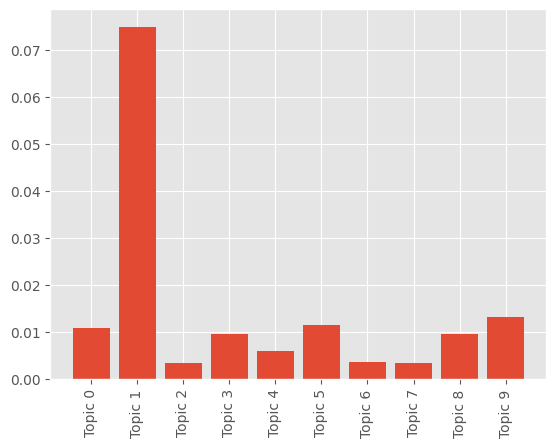

In [135]:
fig, ax = plt.subplots()
ax.bar([f"Topic {i}" for i in range(10)], doc_topics.flatten())
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [138]:
doctop_matrix

array([[ 0.01369594,  0.09665155, -0.07295165, ...,  0.0638594 ,
         0.13266294, -0.00804082],
       [ 0.0069467 ,  0.05002209, -0.02040232, ...,  0.01351326,
         0.02067299,  0.01063642],
       [ 0.0010109 ,  0.0055794 ,  0.00213458, ...,  0.00105289,
        -0.00025666, -0.00022667],
       ...,
       [ 0.02007614,  0.09947923, -0.03937592, ...,  0.04010238,
         0.04229941,  0.00630632],
       [ 0.01263649,  0.09166982,  0.19356328, ...,  0.07033194,
        -0.02869275, -0.05732539],
       [ 0.01233325,  0.09501202, -0.05308135, ..., -0.06804216,
         0.01334059, -0.05903645]])

In [139]:
text = (
    "Donald Trump is the new president of America is going to change some things"
    "related to education, sports, and some politics related to republicans"
)

In [140]:
prep_text = preprocessor.preprocess(text)
prep_text

'donald trump new president america going change education sports politics related'

In [143]:
vect = np.abs(pipe.transform([prep_text]))

In [144]:
vect

array([[0.01651755, 0.12244321, 0.23782577, 0.27478334, 0.11744948,
        0.03848384, 0.04483071, 0.05766571, 0.05254621, 0.01123253]])

In [145]:
doctop_matrix = np.abs(pipe.transform(df_preprocess.prep_text))

In [149]:
sims = cosine_similarity(vect, doctop_matrix).flatten()

In [150]:
sims

array([0.5654457 , 0.70913822, 0.78796641, ..., 0.56802192, 0.85039698,
       0.55758165])

In [155]:
df_sims = (
    df_sample
    .assign(sims=sims)
    .sort_values(by="sims", ascending=False)
    .head(5)
    .short_description
    .to_list()
)
display(df_sims)

['Real estate mogul Donald Trump is dominating GOP polls in the race for the White House. He is the new darling of the conservative',
 "The Trump International Hotel's new makeover was inspired by Donald Trump's recent immigration meeting.",
 'SALT LAKE CITY — Mitt Romney, the 2012 Republican presidential nominee, plans to deliver a sharp broadside against Donald',
 'John F. Kelly’s front-stabbing Donald Trump’s new White House communications director Anthony Scaramucci only hours after',
 'Sheldon Adelson’s advisers are in talks about setting up a new Donald Trump super PAC that could become the central outside']